# Happy Moment
                    By Caihui Xiao (cx2225)

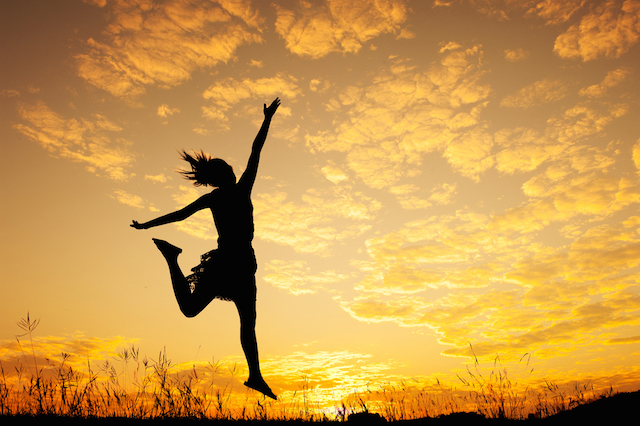

In [9]:
from IPython.display import Image
Image(filename="./Happy.jpg")

HappyDB is a corpus of 100,000 crowd-sourced happy moments. The goal of the corpus is to advance the state of the art of understanding the causes of happiness that can be gleaned from text.

We will focus on what make people have different type of happiness category.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

In [4]:
data = pd.read_csv("processed_moments.csv")
data1 = pd.read_csv("demographic.csv")
data.count(axis=0) 

hmid                     100392
wid                      100392
reflection_period        100392
original_hm              100392
cleaned_hm               100392
modified                 100392
num_sentence             100392
ground_truth_category     14107
predicted_category       100392
id                       100392
text                     100391
dtype: int64

We can see that there is no missing value so we do not worry about that.

We will do analysis about the relationship between sentences and Happiness category label

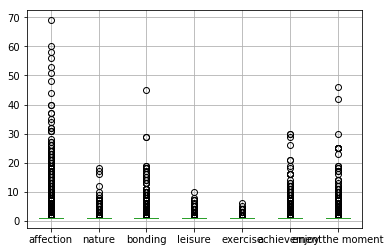

In [11]:
combine_data = pd.merge(data,data1,left_on='wid',right_on='wid')
data_affection = data.loc[data['predicted_category']=='affection']
data_nature = data.loc[data['predicted_category']=='nature']
data_bonding = data.loc[data['predicted_category']=='bonding']
data_enjoy_the_moment = data.loc[data['predicted_category']=='enjoy_the_moment']
data_leisure = data.loc[data['predicted_category']=='leisure']
data_exercise = data.loc[data['predicted_category']=='exercise']
data_achievement = data.loc[data['predicted_category']=='achievement']
data_boxplot = pd.DataFrame({'affection':data_affection['num_sentence'],'nature':data_nature['num_sentence'],'bonding':data_bonding['num_sentence'],'leisure':data_leisure['num_sentence'],'exercise':data_exercise['num_sentence'],'achievement':data_achievement['num_sentence'],'enjoy the moment' : data_enjoy_the_moment['num_sentence']})
data_boxplot.boxplot()  
plt.show()

From the boxplot, we can say that most of them only need few sentences. But for the affection category, the range is bigger than others. We will check what make this happen.

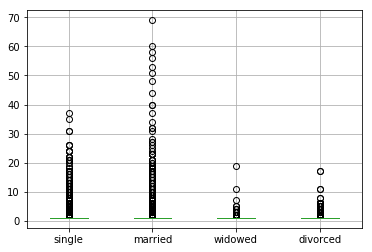

In [12]:
com_affection =  combine_data.loc[combine_data['predicted_category']=='affection']

com_affection_marital_single = com_affection.loc[com_affection['marital'] =='single' ]
com_affection_marital_married = com_affection.loc[com_affection['marital'] =='married' ]
com_affection_marital_widowed = com_affection.loc[com_affection['marital'] =='widowed' ]
com_affection_marital_divorced = com_affection.loc[com_affection['marital'] =='divorced' ]

com_boxplot = pd.DataFrame({'single':com_affection_marital_single['num_sentence'],'married':com_affection_marital_married['num_sentence'],'widowed':com_affection_marital_widowed['num_sentence'],'divorced':com_affection_marital_divorced['num_sentence']})
com_boxplot.boxplot()  
plt.show()

From the plot, we can say that if  people are in married, they are willing to spend more time to describe their happiness moment in affection than others. If they are single, maybe they also spend more time than others. I think they want to share their experiences about their relationship.

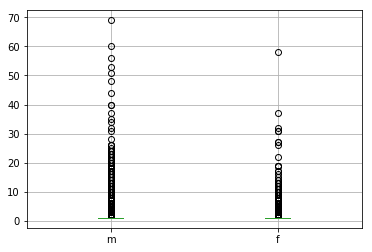

In [13]:
com_affection_male = com_affection.loc[com_affection['gender'] =='m' ]
com_affection_female = com_affection.loc[com_affection['gender'] =='f' ]

com_boxplot1 = pd.DataFrame({'m':com_affection_male['num_sentence'],'f':com_affection_female['num_sentence']})
com_boxplot1.boxplot()  
plt.show()

From this plot, we can say that man spend more time and write more sentences than womens. Maybe in reality, men do not want to show their feelings. They want to do it online.

In the next, we will check the frequency of important word for each catogory. 

We will do the affection at first. 

In [15]:
tokenizer = RegexpTokenizer(r'\w+')

token1 = []
for i in data_affection['text']:
    words = tokenizer.tokenize(text=i)
    for word in words:
        token1.append(word.lower())

fdist1=FreqDist(token1)
fdist1.most_common(50)



[('day', 4611),
 ('time', 4393),
 ('family', 4250),
 ('son', 3443),
 ('daughter', 3229),
 ('wife', 2671),
 ('husband', 2608),
 ('home', 2440),
 ('dog', 2291),
 ('love', 2010),
 ('birthday', 2002),
 ('girlfriend', 1881),
 ('dinner', 1850),
 ('sister', 1847),
 ('played', 1813),
 ('mother', 1728),
 ('watched', 1652),
 ('moment', 1553),
 ('night', 1522),
 ('brother', 1480),
 ('visit', 1463),
 ('mom', 1437),
 ('feel', 1366),
 ('surprise', 1363),
 ('enjoyed', 1363),
 ('life', 1302),
 ('talked', 1279),
 ('kids', 1257),
 ('nice', 1246),
 ('boyfriend', 1217),
 ('spend', 1165),
 ('baby', 1111),
 ('friend', 1095),
 ('school', 1077),
 ('parents', 1067),
 ('morning', 1064),
 ('house', 1064),
 ('walk', 1044),
 ('cat', 1033),
 ('celebrated', 1010),
 ('told', 931),
 ('event', 921),
 ('gift', 914),
 ('dad', 898),
 ('started', 874),
 ('spent', 812),
 ('found', 811),
 ('finally', 777),
 ('called', 773),
 ('bought', 756)]

We can say that in this type, these words are most frequency. They are more care about family and want to share experience about important events like birthday.

We can say these in the following word cloud.

(-0.5, 399.5, 199.5, -0.5)

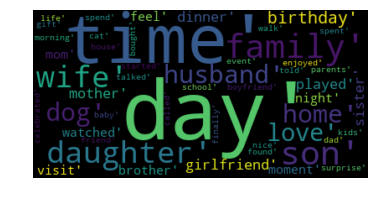

In [16]:
wordcloud = WordCloud().generate(str(fdist1.most_common(50)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In the following, we will analysis the category of nature 

In [17]:
token2 = []
for i in data_nature['text']:
    words = tokenizer.tokenize(text=i)
    for word in words:
        token2.append(word.lower())

fdist2=FreqDist(token2)
fdist2.most_common(50)

[('weather', 535),
 ('rain', 420),
 ('day', 347),
 ('walk', 295),
 ('nice', 278),
 ('beautiful', 245),
 ('planted', 209),
 ('sun', 194),
 ('garden', 146),
 ('spring', 145),
 ('enjoyed', 139),
 ('sunny', 139),
 ('warm', 136),
 ('morning', 127),
 ('time', 126),
 ('finally', 117),
 ('flowers', 112),
 ('hike', 110),
 ('started', 94),
 ('blooming', 87),
 ('watched', 80),
 ('birds', 80),
 ('feel', 78),
 ('park', 75),
 ('tree', 69),
 ('night', 68),
 ('cool', 65),
 ('nature', 60),
 ('air', 58),
 ('hot', 58),
 ('snow', 57),
 ('yard', 55),
 ('home', 54),
 ('sunset', 53),
 ('winter', 53),
 ('stopped', 51),
 ('window', 50),
 ('perfect', 49),
 ('dog', 47),
 ('growing', 46),
 ('weekend', 46),
 ('mountain', 45),
 ('love', 45),
 ('shining', 45),
 ('listening', 45),
 ('hours', 45),
 ('rose', 44),
 ('cold', 44),
 ('water', 44),
 ('temperature', 43)]

In this type, we can say that people more care about weather.
We can say these in the following word cloud.

(-0.5, 399.5, 199.5, -0.5)

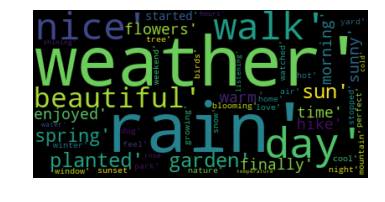

In [18]:
wordcloud = WordCloud().generate(str(fdist2.most_common(50)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In the following, we will analysis the category of bonding. 

In [20]:
token3 = []
for i in data_bonding['text']:
    words = tokenizer.tokenize(text=i)
    for word in words:
        token3.append(word.lower())

fdist3=FreqDist(token2)
fdist3.most_common(50)

[('weather', 535),
 ('rain', 420),
 ('day', 347),
 ('walk', 295),
 ('nice', 278),
 ('beautiful', 245),
 ('planted', 209),
 ('sun', 194),
 ('garden', 146),
 ('spring', 145),
 ('enjoyed', 139),
 ('sunny', 139),
 ('warm', 136),
 ('morning', 127),
 ('time', 126),
 ('finally', 117),
 ('flowers', 112),
 ('hike', 110),
 ('started', 94),
 ('blooming', 87),
 ('watched', 80),
 ('birds', 80),
 ('feel', 78),
 ('park', 75),
 ('tree', 69),
 ('night', 68),
 ('cool', 65),
 ('nature', 60),
 ('air', 58),
 ('hot', 58),
 ('snow', 57),
 ('yard', 55),
 ('home', 54),
 ('sunset', 53),
 ('winter', 53),
 ('stopped', 51),
 ('window', 50),
 ('perfect', 49),
 ('dog', 47),
 ('growing', 46),
 ('weekend', 46),
 ('mountain', 45),
 ('love', 45),
 ('shining', 45),
 ('listening', 45),
 ('hours', 45),
 ('rose', 44),
 ('cold', 44),
 ('water', 44),
 ('temperature', 43)]

In this type, we can say that people more care about weather and maybe go outside.We can say these in the following word cloud.


(-0.5, 399.5, 199.5, -0.5)

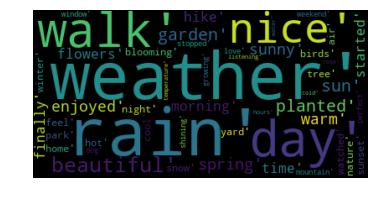

In [21]:
wordcloud = WordCloud().generate(str(fdist3.most_common(50)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In the following, we will analysis the category of enjoy_the_moment. 

In [22]:
token4 = []
for i in data_enjoy_the_moment['text']:
    words = tokenizer.tokenize(text=i)
    for word in words:
        token4.append(word.lower())

fdist4=FreqDist(token4)
fdist4.most_common(50)

[('day', 1420),
 ('ate', 1002),
 ('time', 961),
 ('feel', 905),
 ('happiness', 904),
 ('favorite', 879),
 ('enjoyed', 820),
 ('night', 691),
 ('dinner', 677),
 ('life', 677),
 ('moment', 656),
 ('eat', 591),
 ('morning', 561),
 ('home', 553),
 ('food', 543),
 ('found', 531),
 ('delicious', 503),
 ('event', 484),
 ('lunch', 452),
 ('people', 443),
 ('sleep', 428),
 ('nice', 396),
 ('coffee', 381),
 ('pizza', 379),
 ('makes', 355),
 ('hours', 350),
 ('restaurant', 338),
 ('ice', 329),
 ('free', 312),
 ('breakfast', 301),
 ('love', 294),
 ('cream', 293),
 ('im', 290),
 ('meal', 281),
 ('song', 252),
 ('woke', 252),
 ('watched', 250),
 ('live', 237),
 ('finally', 231),
 ('bought', 229),
 ('positive', 227),
 ('wellbeing', 227),
 ('relax', 225),
 ('emotional', 222),
 ('define', 213),
 ('received', 212),
 ('drive', 202),
 ('book', 198),
 ('store', 196),
 ('birthday', 183)]

In this type, we can say that people more care about the time with others.We can say these in the following word cloud.


(-0.5, 399.5, 199.5, -0.5)

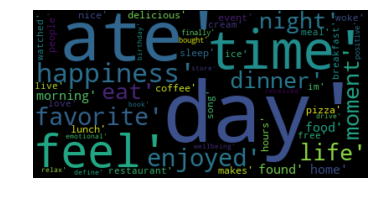

In [23]:
wordcloud = WordCloud().generate(str(fdist4.most_common(50)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [35]:
In the following, we will analysis the category of leisure.

SyntaxError: invalid syntax (<ipython-input-35-fe8183e35802>, line 1)

In [33]:
token5 = []
for i in data_leisure['text']:
    words = tokenizer.tokenize(text=str(i))
    for word in words:
        token5.append(word.lower())

fdist5=FreqDist(token5)
fdist5.most_common(50)


[('watched', 1926),
 ('game', 1125),
 ('played', 884),
 ('favorite', 854),
 ('movie', 832),
 ('video', 533),
 ('time', 482),
 ('read', 406),
 ('tv', 396),
 ('shopping', 389),
 ('day', 341),
 ('episode', 329),
 ('book', 327),
 ('night', 322),
 ('enjoyed', 318),
 ('season', 295),
 ('temple', 283),
 ('listening', 258),
 ('finally', 239),
 ('song', 200),
 ('hours', 199),
 ('started', 193),
 ('sleep', 187),
 ('funny', 180),
 ('vacation', 179),
 ('fun', 179),
 ('found', 172),
 ('weekend', 168),
 ('netflix', 167),
 ('relax', 165),
 ('walk', 156),
 ('team', 145),
 ('series', 143),
 ('morning', 137),
 ('love', 137),
 ('trip', 129),
 ('music', 126),
 ('nap', 126),
 ('baseball', 126),
 ('bought', 123),
 ('excited', 120),
 ('beach', 117),
 ('youtube', 111),
 ('finished', 110),
 ('concert', 110),
 ('win', 110),
 ('im', 107),
 ('nice', 103),
 ('dinner', 103),
 ('local', 101)]

In this type, we can say that people more care about games or vedios.We can say these in the following word cloud.

(-0.5, 399.5, 199.5, -0.5)

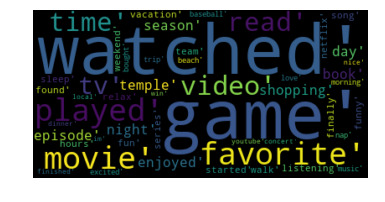

In [34]:

wordcloud = WordCloud().generate(str(fdist5.most_common(50)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In the following, we will analysis the category of exercise.

In [28]:
token6 = []
for i in data_exercise['text']:
    words = tokenizer.tokenize(text=i)
    for word in words:
        token6.append(word.lower())

fdist6=FreqDist(token6)
fdist6.most_common(50)

[('gym', 415),
 ('workout', 259),
 ('run', 241),
 ('miles', 173),
 ('exercise', 169),
 ('morning', 141),
 ('yoga', 103),
 ('time', 100),
 ('feel', 91),
 ('ran', 76),
 ('day', 75),
 ('started', 74),
 ('walk', 59),
 ('completed', 47),
 ('bike', 46),
 ('weight', 45),
 ('class', 44),
 ('ride', 43),
 ('hours', 42),
 ('minutes', 42),
 ('finally', 38),
 ('person', 37),
 ('jog', 35),
 ('lifted', 33),
 ('body', 32),
 ('finished', 28),
 ('fit', 27),
 ('nice', 25),
 ('park', 24),
 ('night', 22),
 ('played', 22),
 ('makes', 21),
 ('hard', 20),
 ('training', 20),
 ('love', 19),
 ('session', 18),
 ('treadmill', 18),
 ('tired', 18),
 ('shape', 17),
 ('woke', 17),
 ('routine', 17),
 ('bicycle', 17),
 ('cardio', 16),
 ('goal', 16),
 ('set', 16),
 ('enjoyed', 16),
 ('friend', 16),
 ('hit', 15),
 ('purchased', 15),
 ('record', 14)]

In this type, we can say that people more care about exercise like gym,yoga or other things.

We can say these in the following word cloud.

(-0.5, 399.5, 199.5, -0.5)

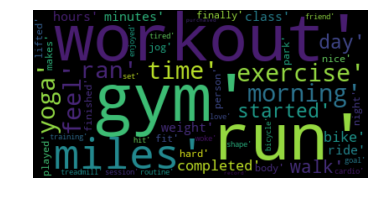

In [29]:
wordcloud = WordCloud().generate(str(fdist6.most_common(50)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In the following, we will analysis the category of achievement.

In [30]:

token7 = []
for i in data_achievement['text']:
    words = tokenizer.tokenize(text=i)
    for word in words:
        token7.append(word.lower())

fdist7=FreqDist(token7)
fdist7.most_common(50)

[('job', 2577),
 ('finally', 2283),
 ('time', 2221),
 ('day', 2157),
 ('found', 1948),
 ('received', 1744),
 ('bought', 1689),
 ('finished', 1593),
 ('car', 1467),
 ('money', 1381),
 ('won', 1339),
 ('completed', 1150),
 ('feel', 1122),
 ('started', 1065),
 ('project', 984),
 ('game', 841),
 ('purchased', 809),
 ('house', 799),
 ('home', 793),
 ('promotion', 770),
 ('event', 770),
 ('moment', 760),
 ('ive', 754),
 ('pay', 744),
 ('im', 717),
 ('weeks', 667),
 ('class', 665),
 ('cleaned', 660),
 ('buy', 658),
 ('life', 655),
 ('school', 648),
 ('company', 640),
 ('college', 637),
 ('managed', 617),
 ('hours', 617),
 ('mturk', 601),
 ('boss', 593),
 ('morning', 587),
 ('paid', 575),
 ('goal', 572),
 ('bonus', 569),
 ('exam', 563),
 ('team', 551),
 ('successfully', 550),
 ('nice', 549),
 ('free', 541),
 ('hard', 537),
 ('hit', 534),
 ('saved', 530),
 ('raise', 519)]

In this type, we can say that people more care about jobs or study. We can see there are exam project. Maybe it is more care their study or career.

We can say these in the following word cloud.

(-0.5, 399.5, 199.5, -0.5)

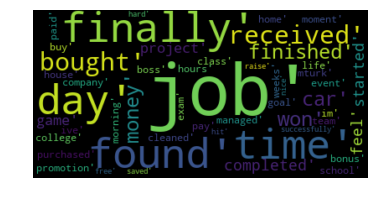

In [37]:
wordcloud = WordCloud().generate(str(fdist7.most_common(50)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Conclusion

We have analysis the relationship about sentences and category of happiness moment. In the category of affection, people like use more sentencs to describe their happiness experience. And if they are married or single, they would like to spend more time to write more sentences to describe their moment. And men wrote more sentences than women. Then, we found most frequency words in different categories. I think in different categories, they focus on different things. We can use this information to do future analysis. 
